<a href="https://colab.research.google.com/github/steve-burman/machine-learning-intro/blob/master/TensorFlow_SXB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Demo
Steve Burman

303-249-1177

steve.burman@jeppesen.com

Check environment by printing welcome message:

In [0]:
message = "Welcome to Steve's TensorFlow Demo space"
print( message )

# Linear Regression
best fit using objective function:  y = m * x + b

In [0]:
import  matplotlib.pyplot  as plt

%tensorflow_version  2.x
import  tensorflow  as  tf
print( tf.__version__ )

from  tensorflow.keras  import Model

%matplotlib inline

def  createSimulatedData( m=0.1, b=0.3, n=100, stddev=0.1 ):
  x = tf.random.uniform( shape=( n, ) )
  noise = tf.random.normal( shape=( len(x), ), stddev=stddev )
  y = m * x + b + noise
  return x, y

def calculateLineSlope(x1, y1, x2, y2):
  dx = x2 - x1
  dy = y2 - y1
  m = dy / dx
  return m

In [0]:
m = calculateLineSlope( 6.9528, 46.3015, 7.0458, 46.1395 )
x_train, y_train = createSimulatedData( m, 46.3015, 200 )
plt.plot( x_train, y_train, 'b.' )

# Decision Tree

## Import datasets

Setup

In [0]:
# Import datasets
from urllib.request import urlretrieve
from numpy import loadtxt
from sklearn.utils import Bunch

# analyze dataset
def analyze_dataset(bunch):
  print( "feature_names = ", bunch.feature_names )
  print( "target_names = ", bunch.target_names )
  # print( "DESCR = ", bunch.DESCR[0:20] )
  print( "data[0:4] = ", bunch.data[0:4] )
  print( "target[0:4] = ", bunch.target[0:4] )

def load_pima_diabetes():
  # https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
  # https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names
  bunch = Bunch()
  bunch.target_names = [ 'Class 0', 'Class 1']
  bunch.feature_names = [
      'Times pregnant'
    , 'Plasma glucose concentration'
    , 'Diastolic blood pressure (mm Hg)'
    , 'Triceps skin fold thickness (mm)'
    , '2-Hour serum insulin (mu U/ml)'
    , 'Body mass index (weight in kg/(height in m)^2)'
    , 'Diabetes pedigree function'
    , 'Age (years)'
  ]
  urlretrieve( url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
    , filename="pima-indians-diabetes.csv" )
  dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')
  bunch.data = dataset[:,0:8]
  bunch.target = dataset[:,8]
  return bunch


### Load Iris dataset

In [2]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()
analyze_dataset( iris_dataset )
# print( "iris_dataset:", iris_dataset )
for i in range( len( iris_dataset.target_names ) ):
  print( "Example: %d: label %s, features %s" % ( i, iris_dataset.target_names[i], iris_dataset.data[i] ) )


feature_names =  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target_names =  ['setosa' 'versicolor' 'virginica']
data[0:4] =  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]]
target[0:4] =  [0 0 0 0]
Example: 0: label setosa, features [5.1 3.5 1.4 0.2]
Example: 1: label versicolor, features [4.9 3.  1.4 0.2]
Example: 2: label virginica, features [4.7 3.2 1.3 0.2]


### Load Pima Indians diabetes dataset

In [3]:
# load Pima dataset
pima_diabetes_dataset = load_pima_diabetes()
analyze_dataset( pima_diabetes_dataset )


feature_names =  ['Times pregnant', 'Plasma glucose concentration', 'Diastolic blood pressure (mm Hg)', 'Triceps skin fold thickness (mm)', '2-Hour serum insulin (mu U/ml)', 'Body mass index (weight in kg/(height in m)^2)', 'Diabetes pedigree function', 'Age (years)']
target_names =  ['Class 0', 'Class 1']
data[0:4] =  [[6.00e+00 1.48e+02 7.20e+01 3.50e+01 0.00e+00 3.36e+01 6.27e-01 5.00e+01]
 [1.00e+00 8.50e+01 6.60e+01 2.90e+01 0.00e+00 2.66e+01 3.51e-01 3.10e+01]
 [8.00e+00 1.83e+02 6.40e+01 0.00e+00 0.00e+00 2.33e+01 6.72e-01 3.20e+01]
 [1.00e+00 8.90e+01 6.60e+01 2.30e+01 9.40e+01 2.81e+01 1.67e-01 2.10e+01]]
target[0:4] =  [1. 0. 1. 0.]


## Train classifier

In [8]:
# Train classifier
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split

def train_classifier( dataset ):
  # set aside some of dataset as train_data and some as test_data (X=data, y=target)
  train_data, test_data, train_target, test_target = train_test_split( dataset.data, dataset.target, test_size=0.33, random_state=42 )
  print( "train_target:", train_target )
  print( "train_data[:5]:", train_data[:5] )
  print( "test_target:", test_target )
  print( "test_data[:5]:", test_data[:5] )
  # build Decision Tree Classifier
  classifier = tree.DecisionTreeClassifier()
  estimator = classifier.fit( train_data, train_target )
  return train_data, test_data, train_target, test_target, classifier

train_data, test_data, train_target, test_target, classifier = train_classifier( iris_dataset )
# train_data, test_data, train_target, test_target, classifier = train_classifier( pima_diabetes_dataset )


train_target: [1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0 0 1 1 0 2
 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1
 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1 1 2 2 0 1 2 0 1 2]
train_data[:5]: [[5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]]
test_target: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]
test_data[:5]: [[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]
 [6.8 2.8 4.8 1.4]]


## Predict label for new observation

In [9]:
# Predict label for new observation
prediction = classifier.predict( test_data )
print( "test_target:", test_target )
print( "Prediction: ", prediction )


test_target: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]
Prediction:  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]


## Visualize decision tree

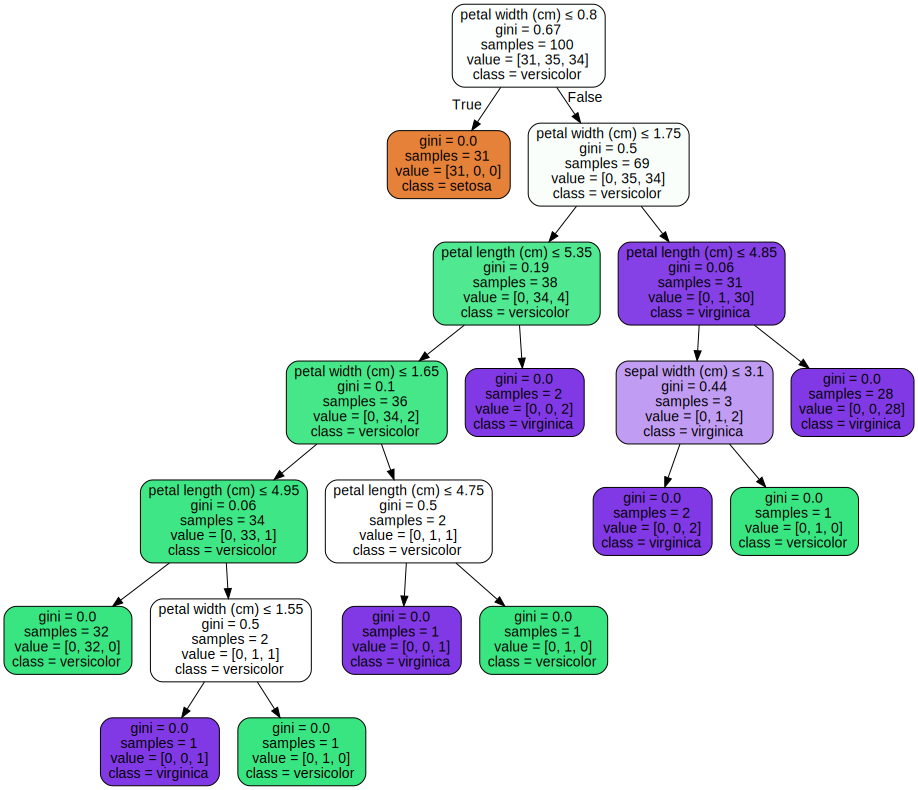

In [10]:
# Visualize decision tree
import graphviz

def visualize_decision_tree(classifier, dataset):
  # tree.plot_tree( classifier.fit( dataset.data, dataset.target ) )
  dot_data = tree.export_graphviz( classifier, out_file=None,
                      feature_names=dataset.feature_names,
                      class_names=dataset.target_names,
                      filled=True, rounded=True,
                      special_characters=True, precision=2)
  graph = graphviz.Source( dot_data )
  return graph

visualize_decision_tree( classifier, iris_dataset )
# visualize_decision_tree( classifier, pima_diabetes_dataset )


# Computer Vision (recognize objects in images)


Load & prepare [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset, which is many "Labelled" image files of hand-written digits.
![MNIST dataset](https://miro.medium.com/max/479/1*yBdJCRwIJGoM7pwU-LNW6Q.png)

In [0]:
import  matplotlib.pyplot  as plt

%tensorflow_version  2.x
import  tensorflow  as  tf
print( tf.__version__ )

from  tensorflow.keras  import Model

%matplotlib inline


mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


Build "Model" using Keras, which calls TensorFlow implementation:

In [0]:
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Flatten( input_shape=[28, 28] )
    #  , tf.keras.layers.Dense( 128, activation='relu' )
    #  , tf.keras.layers.Dropout( 0.2 )
     , tf.keras.layers.Dense( 10, activation='softmax' )
    ]
)

model.compile(
    optimizer = 'adam'
    , loss = 'sparse_categorical_crossentropy'
    , metrics = [ 'accuracy' ]
)

model.summary()
tf.keras.utils.plot_model( model, 'skip_connection.png', show_shapes=True )

Train & evaluate model:

In [0]:
history = model.fit( x_train, y_train, validation_data=(x_test, y_test), epochs=5 )


In [0]:
eval_results = model.evaluate( x_test, y_test )
eval_results

Chart the Model's "Learning" progress:

In [0]:
accuracy     = history.history[     'accuracy' ]
val_accuracy = history.history[ 'val_accuracy' ]
loss     = history.history[     'loss' ]
val_loss = history.history[ 'val_loss' ]
epochs = range( len( accuracy ) )

plt.title( 'Training & Validation Accuracy' )
plt.plot( epochs,     accuracy, color='green',   label='Training' )
plt.plot( epochs, val_accuracy, color='orange', label='Validation' )
plt.xlabel( 'Epoch' )
plt.ylabel( 'Accuracy' )
plt.legend()
_ = plt.figure()

plt.title( 'Training & Validation Loss' )
plt.plot( epochs,     loss, color='red', label='Loss' )
plt.plot( epochs, val_loss, color='orange', label='Validation' )
plt.xlabel( 'Epoch' )
plt.ylabel( 'Loss' )
plt.legend()
_ = plt.figure()


Visualize Learned Network "Weights":

In [0]:
from  matplotlib.colors import LinearSegmentedColormap

model.summary()

def  show_layer_weights(p_digit_number):
  dense_layer = model.layers[1]
  weights_inspect = dense_layer.get_weights()[0]
  dense_layer_weights = []
  for connection in weights_inspect:
    weight = connection[ p_digit_number ]
    dense_layer_weights.append( weight )
  dense_layer_weights
  img = tf.reshape( dense_layer_weights, [28, 28] )
  # plt.imshow( img, cmap = cmap )
  return img

fig, axes = plt.subplots( 2, 5, figsize=(10, 4) )
fig.tight_layout()
axes = axes.reshape(-1)
for digit_number in range( 0, 10 ):
  title = "Digit " + str( digit_number )
  a = axes[ digit_number ]
  img = show_layer_weights( digit_number )
  cmap = LinearSegmentedColormap.from_list( 'rg', ["red", "lightgray", "green"], N=256 )
  a.imshow( img, cmap = cmap )
  a.set_title( title )
  a.set_xticks(()) # ticks be gone
  a.set_yticks(())
plt.show()


# Convolution

Setup...

In [0]:
import scipy
from skimage  import color, data

%matplotlib inline
import matplotlib.pyplot as plt

%tensorflow_version  2.x
import  tensorflow  as  tf
print( tf.__version__ )

from  tensorflow.keras  import Model


Load Data

In [0]:
img = data.astronaut()
img = color.rgb2gray( img )
plt.axis( 'off' )
plt.imshow( img, cmap=plt.cm.gray )
plt.title( 'Eileen Collins, 1st Woman Shuttle Commander' )

Build Model:

In [0]:
model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Conv2D( name = 'Edges_from_Pixels'
        , filters = 4
        , kernel_size = ( 4, 4 )
        , input_shape = ( 10, 10, 3 )
    )
)

model.add(
    tf.keras.layers.Conv2D( name = 'Shapes_from_Edges'
        , filters = 8
        , kernel_size = ( 3, 3 )
    )
)

model.summary()
tf.keras.utils.plot_model( model, 'skip_connection.png', show_shapes=True )
